In [66]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Flatten, Activation
from keras.layers import Dropout,BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import RMSprop, Adam
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report , accuracy_score


In [64]:
test  = pd.read_csv(r"C:\Users\phaneendra.veguru\Desktop\ml\har\DATA_UCI/test.csv")  
train = pd.read_csv(r"C:\Users\phaneendra.veguru\Desktop\ml\har\DATA_UCI/train.csv")  

In [22]:
# suffling data 
from sklearn.utils import shuffle

test  = shuffle(test)
train = shuffle(train)

In [23]:
train = train.drop("subject", axis=1)
test = test.drop("subject", axis=1)

In [24]:
# separating data inputs and output lables 
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values

In [25]:
# encoding labels 
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

# encoding test labels 
encoder.fit(testLabel)
test_target = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
train_target = encoder.transform(trainLabel)

In [26]:
train.shape,trainData.shape,train_target.shape,testData.shape,test_target.shape

((7352, 562), (7352, 561), (7352,), (2947, 561), (2947,))

In [27]:
#define the encoder function.
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

train_target= one_hot_encode(train_target)
test_target = one_hot_encode(test_target)

In [28]:
train.shape,trainData.shape,train_target.shape,testData.shape,test_target.shape


((7352, 562), (7352, 561), (7352, 6), (2947, 561), (2947, 6))

In [29]:
train_target

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [49]:
def confusionMatrix(pred):
    pred = np.argmax(pred,axis = 1) 
    y_true = np.argmax(test_target,axis = 1)
    print(classification_report(y_true, pred))
    CM = confusion_matrix(y_true, pred)
    fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(15, 5))
    plt.show()


# Supervised Neural Network using multi-layer preceptron
 MLP classifier using Stochastic gradient descent optimizer

In [59]:
from sklearn.neural_network import MLPClassifier
mlpSGD  =  MLPClassifier(hidden_layer_sizes=(90,), max_iter=2000 , alpha=1e-4, solver='sgd' , verbose=10 ,
                            tol=1e-19 , random_state=1, learning_rate_init=.001)

Iteration 1, loss = 2.66695958
Iteration 2, loss = 1.90458608
Iteration 3, loss = 1.67561516
Iteration 4, loss = 1.52617112
Iteration 5, loss = 1.40974637
Iteration 6, loss = 1.31244139
Iteration 7, loss = 1.23020431
Iteration 8, loss = 1.15828944
Iteration 9, loss = 1.09728212
Iteration 10, loss = 1.04313375
Iteration 11, loss = 0.99573238
Iteration 12, loss = 0.95282783
Iteration 13, loss = 0.91408498
Iteration 14, loss = 0.87940840
Iteration 15, loss = 0.84685295
Iteration 16, loss = 0.81784935
Iteration 17, loss = 0.79122140
Iteration 18, loss = 0.76602511
Iteration 19, loss = 0.74467441
Iteration 20, loss = 0.72320226
Iteration 21, loss = 0.70330929
Iteration 22, loss = 0.68443381
Iteration 23, loss = 0.66786747
Iteration 24, loss = 0.65214429
Iteration 25, loss = 0.63772772
Iteration 26, loss = 0.62296198
Iteration 27, loss = 0.60949830
Iteration 28, loss = 0.59740216
Iteration 29, loss = 0.58575282
Iteration 30, loss = 0.57460391
Iteration 31, loss = 0.56377856
Iteration 32, los

Iteration 253, loss = 0.12891036
Iteration 254, loss = 0.12842451
Iteration 255, loss = 0.12787219
Iteration 256, loss = 0.12758391
Iteration 257, loss = 0.12740779
Iteration 258, loss = 0.12720080
Iteration 259, loss = 0.12669966
Iteration 260, loss = 0.12717202
Iteration 261, loss = 0.12673258
Iteration 262, loss = 0.12571855
Iteration 263, loss = 0.12506877
Iteration 264, loss = 0.12528140
Iteration 265, loss = 0.12439002
Iteration 266, loss = 0.12435371
Iteration 267, loss = 0.12376977
Iteration 268, loss = 0.12324246
Iteration 269, loss = 0.12278309
Iteration 270, loss = 0.12277004
Iteration 271, loss = 0.12299037
Iteration 272, loss = 0.12255485
Iteration 273, loss = 0.12152839
Iteration 274, loss = 0.12169283
Iteration 275, loss = 0.12167062
Iteration 276, loss = 0.12222846
Iteration 277, loss = 0.12118437
Iteration 278, loss = 0.12137287
Iteration 279, loss = 0.12011625
Iteration 280, loss = 0.11981253
Iteration 281, loss = 0.11988438
Iteration 282, loss = 0.11857395
Iteration 

Iteration 502, loss = 0.08180766
Iteration 503, loss = 0.08319260
Iteration 504, loss = 0.08174297
Iteration 505, loss = 0.08179196
Iteration 506, loss = 0.08098096
Iteration 507, loss = 0.08179538
Iteration 508, loss = 0.08135402
Iteration 509, loss = 0.08111304
Iteration 510, loss = 0.08149773
Iteration 511, loss = 0.08094306
Iteration 512, loss = 0.08163148
Iteration 513, loss = 0.08091885
Iteration 514, loss = 0.08119532
Iteration 515, loss = 0.08103211
Iteration 516, loss = 0.08053019
Iteration 517, loss = 0.08029441
Iteration 518, loss = 0.08014158
Iteration 519, loss = 0.08152661
Iteration 520, loss = 0.08046512
Iteration 521, loss = 0.08003803
Iteration 522, loss = 0.08033315
Iteration 523, loss = 0.08106696
Iteration 524, loss = 0.07972148
Iteration 525, loss = 0.08109954
Iteration 526, loss = 0.07925800
Iteration 527, loss = 0.07939140
Iteration 528, loss = 0.07955065
Iteration 529, loss = 0.07934315
Iteration 530, loss = 0.07867090
Iteration 531, loss = 0.07959478
Iteration 

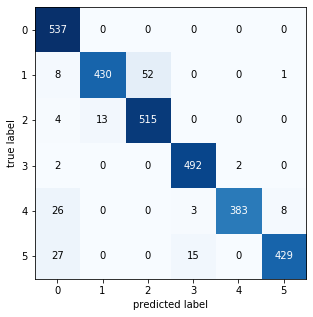

In [58]:
nnModelSGD  = mlpSGD.fit(trainData , train_target)
y_pred = nnModelSGD.predict(testData)
score = accuracy_score(test_target, y_pred)
confusionMatrix(y_pred)

MLP classifier using ADAM optimizer

In [60]:
mlpADAM =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='adam' , verbose=10  \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001)

Iteration 1, loss = 2.02082825
Iteration 2, loss = 1.11909764
Iteration 3, loss = 0.81771824
Iteration 4, loss = 0.65824292
Iteration 5, loss = 0.55764661
Iteration 6, loss = 0.48363413
Iteration 7, loss = 0.43879585
Iteration 8, loss = 0.38683219
Iteration 9, loss = 0.35409779
Iteration 10, loss = 0.32490613
Iteration 11, loss = 0.29742393
Iteration 12, loss = 0.27756090
Iteration 13, loss = 0.25566093
Iteration 14, loss = 0.24027345
Iteration 15, loss = 0.22918678
Iteration 16, loss = 0.22098746
Iteration 17, loss = 0.20316816
Iteration 18, loss = 0.19877889
Iteration 19, loss = 0.17756608
Iteration 20, loss = 0.17278381
Iteration 21, loss = 0.16336861
Iteration 22, loss = 0.15703104
Iteration 23, loss = 0.14862032
Iteration 24, loss = 0.14646626
Iteration 25, loss = 0.13826877
Iteration 26, loss = 0.13684326
Iteration 27, loss = 0.12932511
Iteration 28, loss = 0.12396357
Iteration 29, loss = 0.12144398
Iteration 30, loss = 0.11415185
Iteration 31, loss = 0.11365350
Iteration 32, los

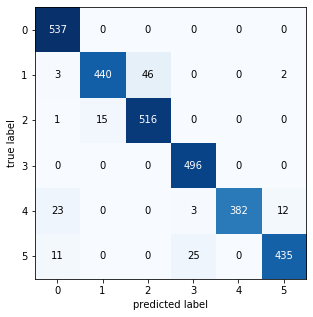

In [62]:
nnModelADAM = mlpADAM.fit(trainData , train_target)
y_pred = nnModelADAM.predict(testData)
score = accuracy_score(test_target, y_pred)
confusionMatrix(y_pred)

# Neural Network Model Using Keras

In [50]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=561))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

Epoch 1/30
7352/7352 [==============================] - 0s 60us/step - loss: 1.4594 - accuracy: 0.3508
Epoch 2/30
7352/7352 [==============================] - 0s 37us/step - loss: 0.9407 - accuracy: 0.5604
Epoch 3/30
7352/7352 [==============================] - 0s 39us/step - loss: 0.7473 - accuracy: 0.6632
Epoch 4/30
7352/7352 [==============================] - 0s 38us/step - loss: 0.6184 - accuracy: 0.7331
Epoch 5/30
7352/7352 [==============================] - 0s 37us/step - loss: 0.5336 - accuracy: 0.7786
Epoch 6/30
7352/7352 [==============================] - 0s 35us/step - loss: 0.4673 - accuracy: 0.8048
Epoch 7/30
7352/7352 [==============================] - 0s 35us/step - loss: 0.4211 - accuracy: 0.8262
Epoch 8/30
7352/7352 [==============================] - 0s 35us/step - loss: 0.3841 - accuracy: 0.8439
Epoch 9/30
7352/7352 [==============================] - 0s 35us/step - loss: 0.3669 - accuracy: 0.8445
Epoch 10/30
7352/7352 [==============================] - 0s 35us/step - l

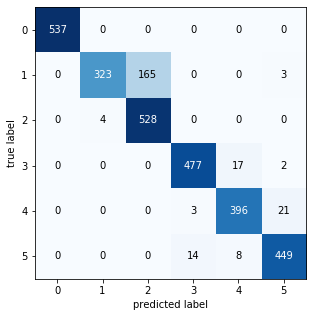

In [51]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(trainData, train_target,epochs=30,batch_size=128)
score = model.evaluate(testData, test_target, batch_size=128)
print(score)
y_pred = model.predict(testData)
confusionMatrix(y_pred)


Epoch 1/30
7352/7352 [==============================] - 0s 66us/step - loss: 0.1786 - accuracy: 0.9313
Epoch 2/30
7352/7352 [==============================] - 0s 39us/step - loss: 0.1597 - accuracy: 0.9350
Epoch 3/30
7352/7352 [==============================] - 0s 37us/step - loss: 0.1637 - accuracy: 0.9358
Epoch 4/30
7352/7352 [==============================] - 0s 37us/step - loss: 0.1615 - accuracy: 0.9366
Epoch 5/30
7352/7352 [==============================] - 0s 38us/step - loss: 0.1705 - accuracy: 0.9298
Epoch 6/30
7352/7352 [==============================] - 0s 40us/step - loss: 0.1546 - accuracy: 0.9348
Epoch 7/30
7352/7352 [==============================] - 0s 40us/step - loss: 0.1570 - accuracy: 0.9346
Epoch 8/30
7352/7352 [==============================] - 0s 45us/step - loss: 0.1565 - accuracy: 0.9370
Epoch 9/30
7352/7352 [==============================] - 0s 41us/step - loss: 0.1582 - accuracy: 0.9348
Epoch 10/30
7352/7352 [==============================] - 0s 37us/step - l

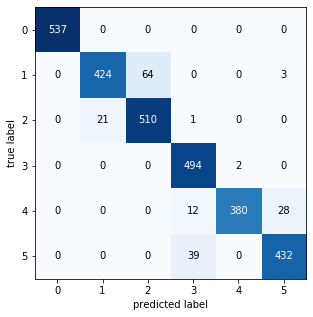

In [53]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(trainData, train_target,epochs=30,batch_size=128)
score = model.evaluate(testData, test_target, batch_size=128)
print(score)
pred = model.predict(testData)
confusionMatrix(pred)
